# 0. Импортируем необходимые библиотеки

In [184]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# 1. Загрузка, исследование и обработка данных

## 1.1. Загрузим необходимые для работы данные

In [185]:
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", 
                  sep = '\t')

print(f'Количество строк: {len(data)}')
data.head()

Количество строк: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 1.2. Опишем, что означает каждый признак в датасете

> **Люди**

* **ID**: Уникальный идентификатор клиента
* **Year_Birth**: год рождения Клиента
* **Education**: уровень образования Клиента
* **Marital_Status**: семейное положение Клиента
* **Income**: годовой доход семьи клиента
* **Kidhome**: Количество детей в семье клиента
* **Teenhome**: Количество подростков в семье клиента
* **Dt_Customer**: Дата регистрации клиента в компании
* **Recency**: Количество дней, прошедших с момента последней покупки клиента
* **Complain**: 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

> **Продукты**

* **MntWines**: Сумма, потраченная на вино за последние 2 года
* **MntFruits**: Количество, потраченное на фрукты за последние 2 года
* **MntMeatProducts**: Количество, потраченное на мясо за последние 2 года
* **MntFishProducts**: Количество, потраченное на рыбу за последние 2 года
* **MntSweetProducts**: Сумма, потраченная на сладости за последние 2 года
* **MntGoldProds**: Сумма, потраченная на золото за последние 2 года

> **Продвижение**

* **NumDealsPurchases**: Количество покупок, совершенных со скидкой
* **AcceptedCmp1**: 1, если клиент принял предложение в рамках 1-й кампании, в противном случае 0
* **AcceptedCmp2**: 1, если клиент принял предложение во время 2-й кампании, в противном случае 0
* **AcceptedCmp3**: 1, если клиент принял предложение в рамках третьей кампании, 0 в противном случае
* **AcceptedCmp4**: 1, если клиент принял предложение в 4-й кампании, в противном случае 0
* **AcceptedCmp5**: 1, если клиент принял предложение в 5-й кампании, в противном случае 0
* **Response**: 1, если клиент принял предложение в последней кампании, в противном случае 0

> **Место**

* **NumWebPurchases**: Количество покупок, совершенных через веб-сайт компании
* **NumCatalogPurchases**: Количество покупок, совершенных с использованием каталога
* **NumStorePurchases**: Количество покупок, совершенных непосредственно в магазинах
* **NumWebVisitsMonth**: Количество посещений веб-сайта компании за последний месяц

## 1.3. Работа с пропущенными значениями

### 1.3.1. Посмотрим количество пропущенных значений для каждого признака

In [186]:
print("Пропущенные значения в датасете:")
print(data.isnull().sum())

Пропущенные значения в датасете:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


### 1.3.2. Посмотрим количество пропущенных значений для каждого признака в процентах

In [187]:
print("Пропущенные значения в датасете в %:")
print((data.isnull().sum() / data.shape[0] * 100).round(2).astype(str) + "%")

Пропущенные значения в датасете в %:
ID                      0.0%
Year_Birth              0.0%
Education               0.0%
Marital_Status          0.0%
Income                 1.07%
Kidhome                 0.0%
Teenhome                0.0%
Dt_Customer             0.0%
Recency                 0.0%
MntWines                0.0%
MntFruits               0.0%
MntMeatProducts         0.0%
MntFishProducts         0.0%
MntSweetProducts        0.0%
MntGoldProds            0.0%
NumDealsPurchases       0.0%
NumWebPurchases         0.0%
NumCatalogPurchases     0.0%
NumStorePurchases       0.0%
NumWebVisitsMonth       0.0%
AcceptedCmp3            0.0%
AcceptedCmp4            0.0%
AcceptedCmp5            0.0%
AcceptedCmp1            0.0%
AcceptedCmp2            0.0%
Complain                0.0%
Z_CostContact           0.0%
Z_Revenue               0.0%
Response                0.0%
dtype: object


Пропуски есть только в столбце **Income**, и то их процент очень небольшой (поэтому этот признак мы точно оставим). Чтобы избавиться от пропусков, просто заменим их на медианы.

### 1.3.3. Заменим пропущенные значения на медианы

In [188]:
data['Income'] = data['Income'].fillna(data['Income'].median())

### 1.3.4. Проверим, что пропущенных значений больше не осталось

In [189]:
print("Пропущенные значения в датасете:")
print(data.isnull().sum())

Пропущенные значения в датасете:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


## 1.4. Data engineering

Признаки **Year_Birth** и **Dt_Customer** могут быть не очень полезными для модели, поэтому преобразуем их в признаки **Age** (возраст клиента на момент 17.09.2024) и **DaysPassedSinceRegistration** (количество дней, которое прошло с момента регистрации пользователя, на момент 17.09.2024).

In [190]:
# Текущая дата
current_date = datetime(2024, 9, 17)

data['Age'] = current_date.year - data['Year_Birth']
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['DaysPassedSinceRegistration'] = (current_date - data['Dt_Customer']).dt.days

data = data.drop(columns=['Year_Birth', 'Dt_Customer'])

data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,DaysPassedSinceRegistration
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,67,4396
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,70,3846
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,59,4045
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,40,3872
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,43,3894


## 1.5. Работа с выбросами

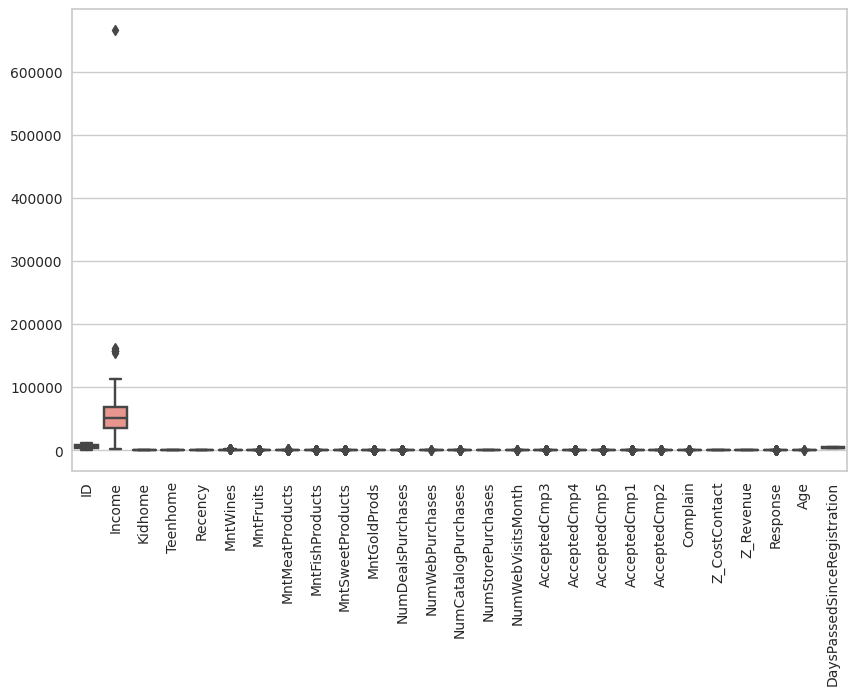

In [191]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

Видим, что выбросы есть только по признаку **Income**.
Посмотрим их количество и процент от общего числа объектов.

In [192]:
# Рассчитываем квартильные значения
Q1 = data['Income'].quantile(0.25)  # Первый квартиль (25-й перцентиль)
Q3 = data['Income'].quantile(0.75)  # Третий квартиль (75-й перцентиль)
IQR = Q3 - Q1  # Межквартильный размах

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Количество выбросов
outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
num_outliers = outliers.shape[0]

# Процент выбросов
percent_outliers = 100 * num_outliers / data.shape[0]

print(f'Количество выбросов: {num_outliers}')
print(f'Процент выбросов: {percent_outliers:.3g}%')

Количество выбросов: 8
Процент выбросов: 0.357%


Видим, что процент выбросов = 0.357%. Наша цель - сегментация среднего клиента, а не экстремальных случаев, причём удаление выбросов сделает модель более стабильной и исключит искажение результатов (ведь, к примеру, алгоритм KMeans очень чувствителен к выбросам, даже несколько выбросов может повлиять на центры кластеров и исказить результаты). Поэтому удалим их.

In [193]:
# Рассчитываем квартильные значения
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных, удаление выбросов
filtered_data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

# Проверка результатов
print(f'Размер исходного набора данных: {data.shape[0]}')
print(f'Размер набора данных после удаления выбросов: {filtered_data.shape[0]}')
print(f'Удалено выбросов: {data.shape[0] - filtered_data.shape[0]}')

Размер исходного набора данных: 2240
Размер набора данных после удаления выбросов: 2232
Удалено выбросов: 8


## 1.6. Кодировка категориальных признаков

В этой задаче из всех признаков категориальными являются **Education** и **Marital_Status**. Посмотрим, какие значения они могут принимать.

In [194]:
unique_education_values = data['Education'].unique()
unique_martial_status_values = data['Marital_Status'].unique()

print('Значения, которые принимает признак Education:')
print(*unique_education_values, sep='; ')
print('\n')
print('Значения, которые принимает признак Marital_Status:')
print(*unique_martial_status_values, sep='; ')

Значения, которые принимает признак Education:
Graduation; PhD; Master; Basic; 2n Cycle


Значения, которые принимает признак Marital_Status:
Single; Together; Married; Divorced; Widow; Alone; Absurd; YOLO


Для начала закодируем значения признака **Education**. Так как уровни образования последовательны (Basic -> Graduation -> Master -> PhD), то вполне естественно и логично закодировать их последовательными числами 0, 1, 2, 3 соответственно. При этом уровень образования 2n Cycle не входит в эту логическую последовательность уровней образования, а находится вне её, так как это второе образование. Поэтому можно закодировать именно этот уровень с помощью One-Hot Encoding (а в исходном столбце будем кодировать его значением -1; хоть это и не является "естественным" представлением, но так как у нас будет отдельный признак **2n_Cycle_flag**, то так можно сделать). Таким образом мы сможем оптимально закодировать значения признака **Education**.

In [195]:
# Шаг 1: Числовая кодировка для остальных значений Education
education_mapping = {
    'Basic': 0,
    'Graduation': 1,
    'Master': 2,
    'PhD': 3
}

# Применяем числовую кодировку, где не '2n Cycle'
data['Education_encoded'] = data['Education'].map(education_mapping)

# Шаг 2: One-Hot encoding для '2n Cycle'
data['2n_Cycle_flag'] = (data['Education'] == '2n Cycle').astype(int)

# Шаг 3: Заменяем пропуски в Education_encoded (где был '2n Cycle') на -1 или другой маркер
data['Education_encoded'] = data['Education_encoded'].fillna(-1)

# Проверка результатов
print(data[['Education', 'Education_encoded', '2n_Cycle_flag']].head(10))

    Education  Education_encoded  2n_Cycle_flag
0  Graduation                1.0              0
1  Graduation                1.0              0
2  Graduation                1.0              0
3  Graduation                1.0              0
4         PhD                3.0              0
5      Master                2.0              0
6  Graduation                1.0              0
7         PhD                3.0              0
8         PhD                3.0              0
9         PhD                3.0              0


In [196]:
data = data.drop(columns=['Education'])

Далее закодируем значения признака **Marital_Status**. Их нельзя как-то естественно упорядочить, поэтому просто используем 

In [197]:
# Применяем One-Hot Encoding к признаку Marital_Status и удаляем исходный столбец
data = pd.get_dummies(data, columns=['Marital_Status'], prefix='Marital_Status', drop_first=False)
new_columns = [col for col in data.columns if 'Marital_Status_' in col]
data[new_columns] = data[new_columns].astype(int)

data.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_encoded,2n_Cycle_flag,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,58138.0,0,0,58,635,88,546,172,88,...,1.0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,11,1,6,2,1,...,1.0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,1.0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,11,4,20,10,3,...,1.0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,173,43,118,46,27,...,3.0,0,0,0,0,1,0,0,0,0


## 1.7. Исследование данных

Сначала посмотрим распределения значений для каждого признака.

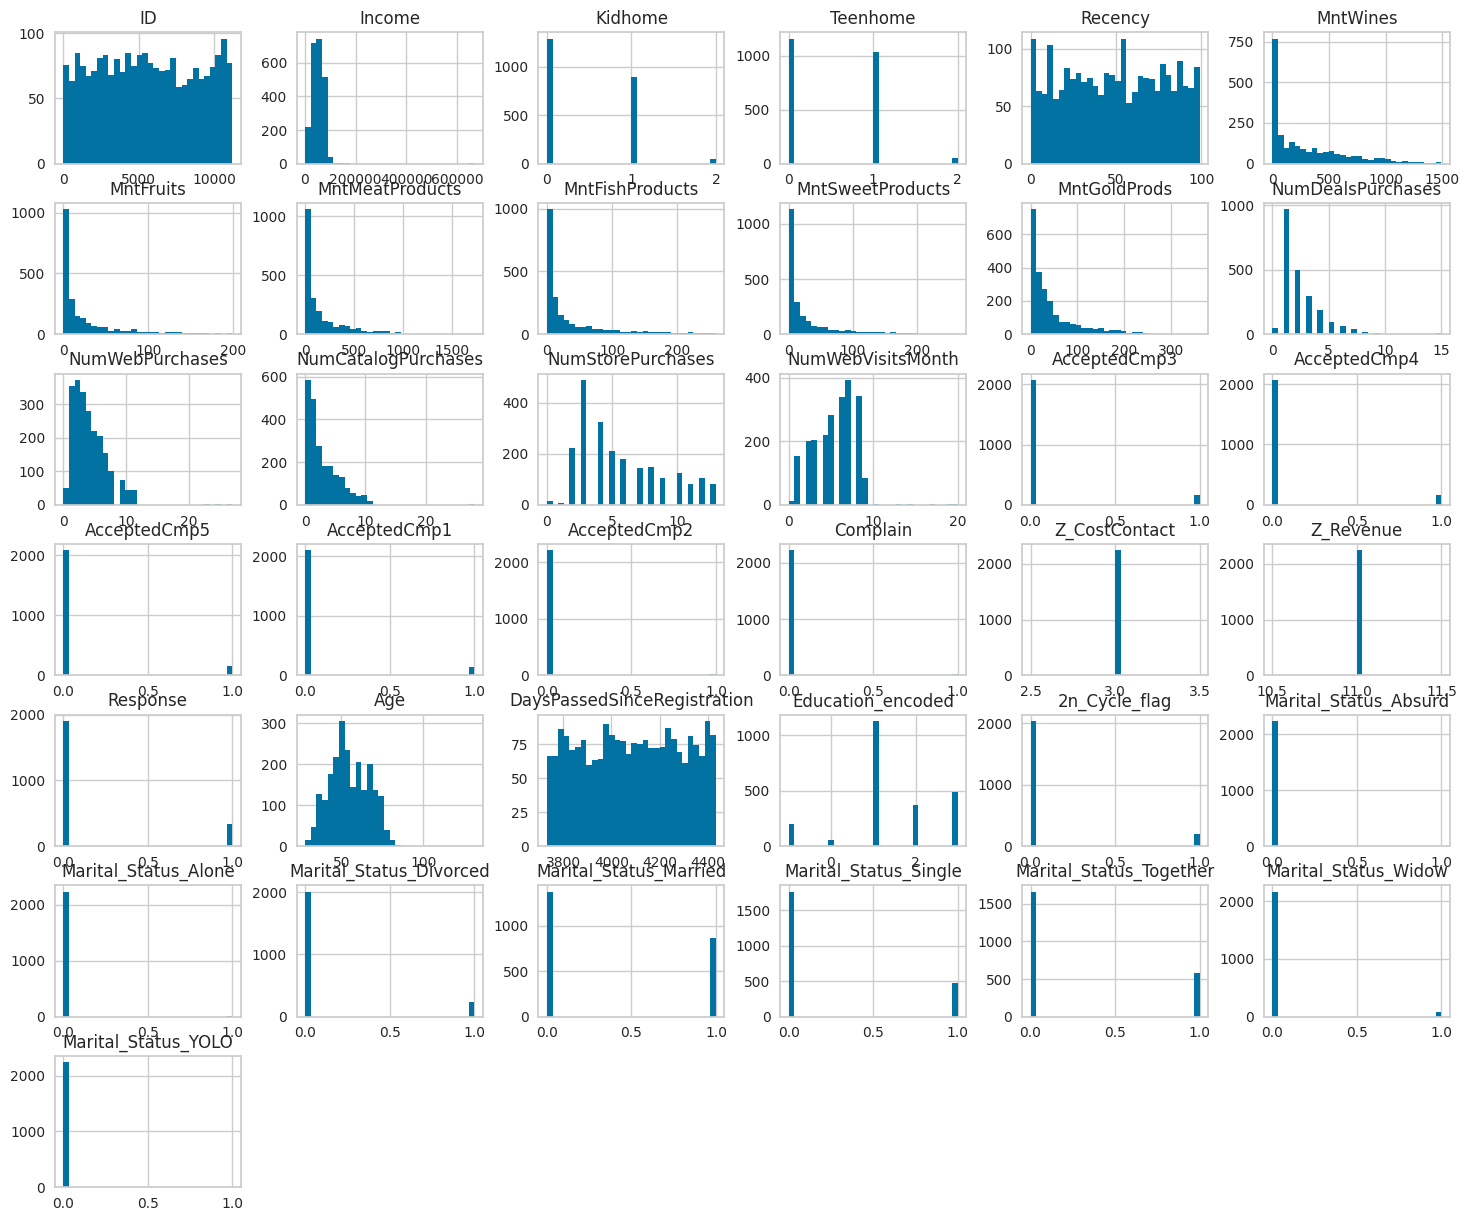

In [198]:
data.hist(figsize=(18, 15), bins=30)
plt.show()

Заметили два очень странных признака **Z_CostContact** и **Z_Revenue**, которые, исходя из гистограмм, принимают всегда одни и те же значения. Проверим это.

In [199]:
print('Значения, принимаемые столбцом Z_CostContact:')
print(*data['Z_CostContact'].unique())
print('Значения, принимаемые столбцом Z_Revenue:')
print(*data['Z_Revenue'].unique())

Значения, принимаемые столбцом Z_CostContact:
3
Значения, принимаемые столбцом Z_Revenue:
11


Эти 2 столбца действительно всегда принимают одно значение, так что удалим их.

In [200]:
data = data.drop(columns=['Z_CostContact', 'Z_Revenue'])

Далее посторим тепловую карту, чтобы просмотреть корреляции между признаками.

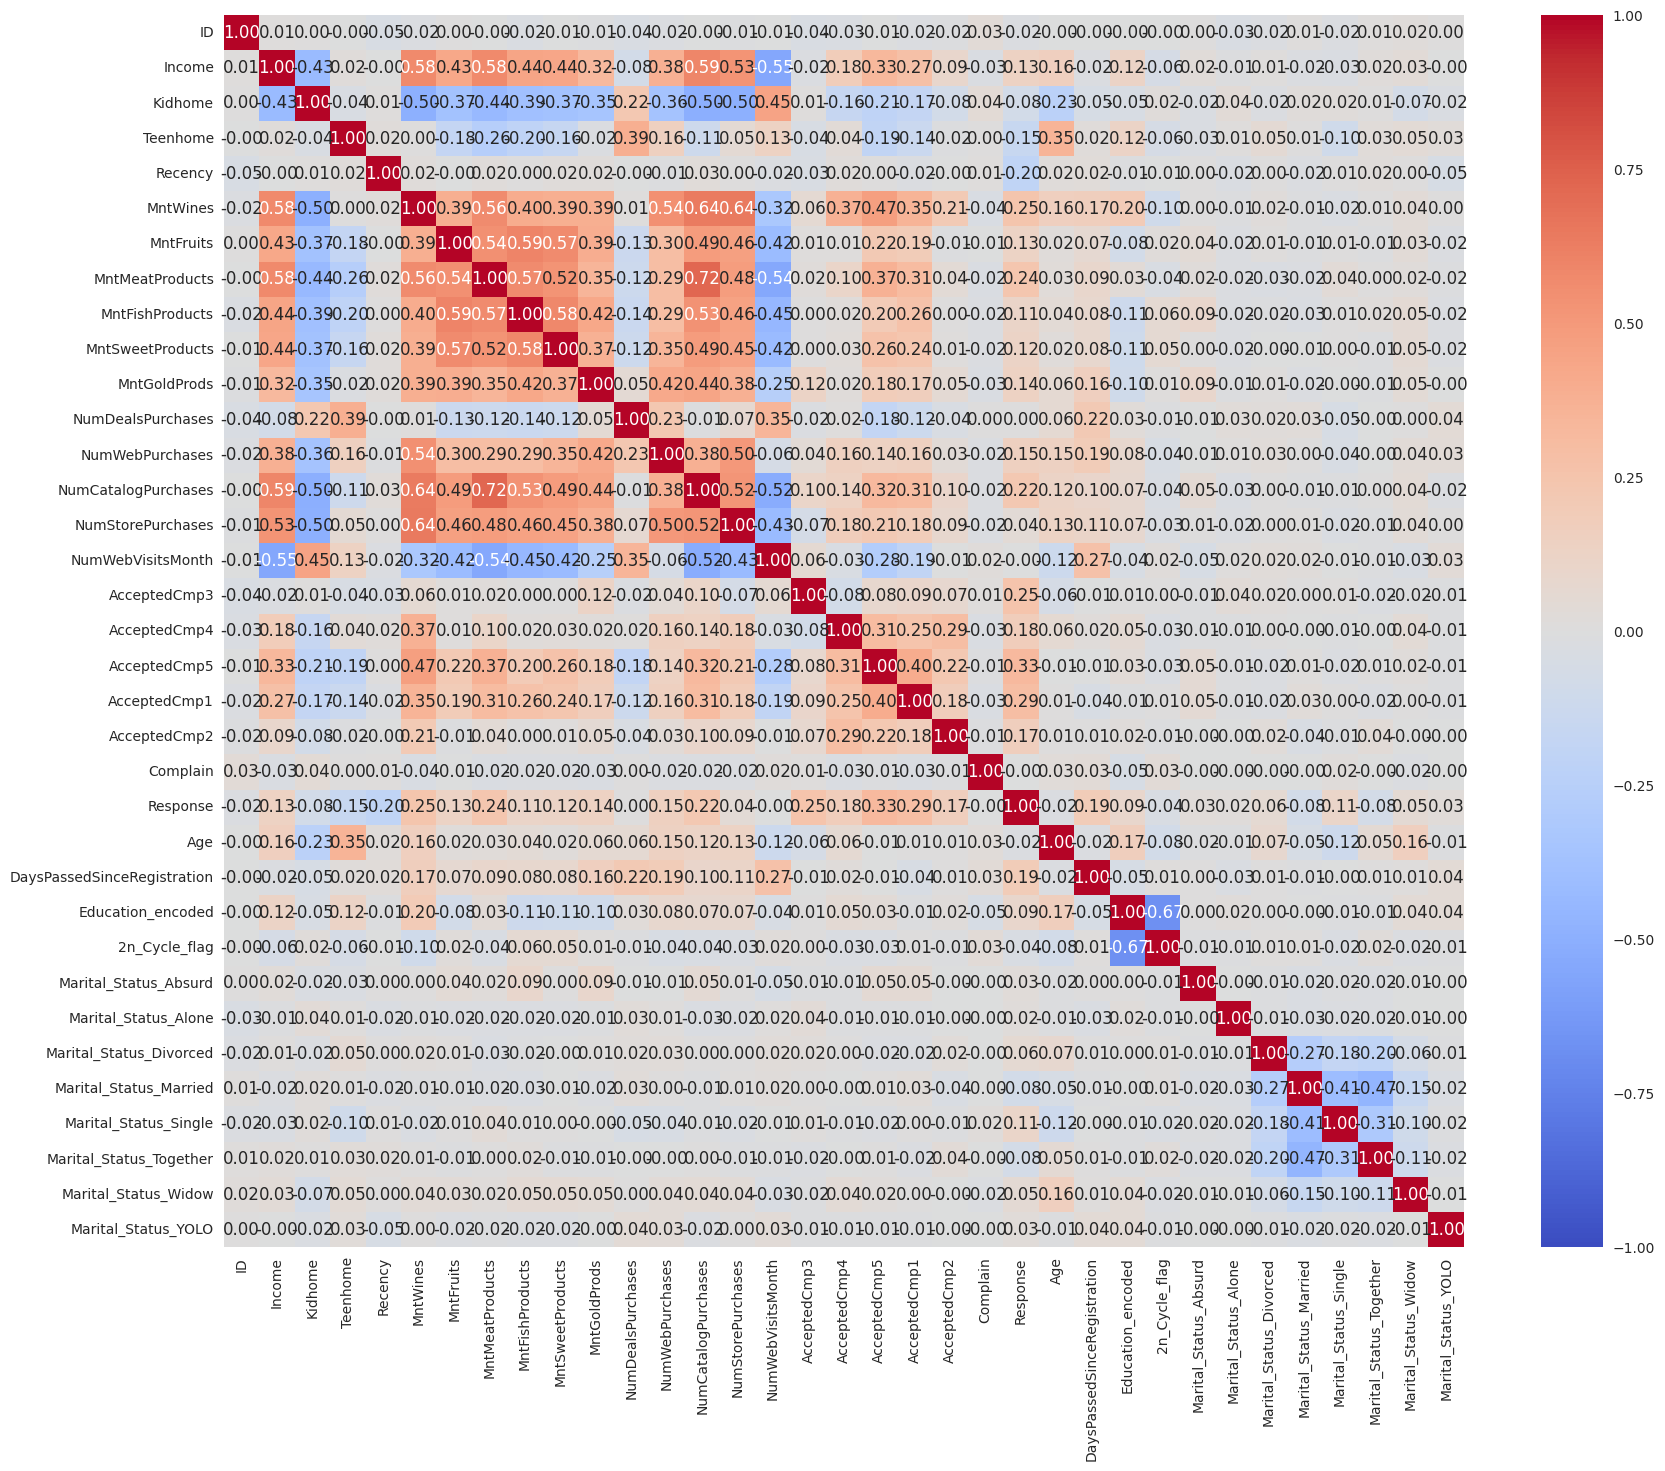

In [201]:
# расчет корреляционной матрицы
corr_matrix = data.corr()

# построение тепловой карты
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.show()

С помощью тепловой карты можно заметить, что есть множество признаков с высокой корреляцией. Они могут внести шум в данных, давать не очень много полезной информации и приводить к проклятию размерности, так что воспользуемся методами уменьшения размерности.

# 3. Использование методов уменьшения размерности

## 3.1. PCA (Principal Component Analysis)

**PCA (Principal Component Analysis)** - метод главных компонент, находит только линейные комбинации исходных признаков. Метод заключается в приближении матрицы признаков матрицей меньшего ранга, так называемое низкоранговое приближение. PCA находит множество новых измерений, которые ортогональны (таким образом линейно независимы) и отранжированы по величине дисперсии, которую они объясняют. Это значит, что более значимые principal оси будут первыми (более значимые = больше дисперсия/больше разброс в данных).

Text(0, 0.5, 'cumulative explained variance')

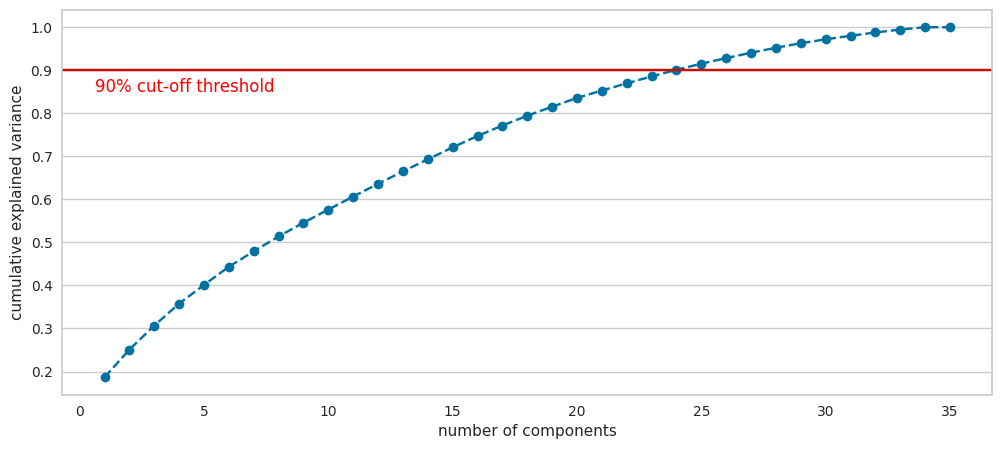

In [202]:
data_scaled = StandardScaler().fit_transform(data)

pca = PCA().fit(data_scaled)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_) + 1, 1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.6, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.grid(axis='x')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [203]:
data_scaled = StandardScaler().fit_transform(data)

pca = PCA(n_components=24, random_state=42)
data_embedding_pca = pca.fit_transform(data_scaled)

fig = px.scatter_3d(
    data_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

# 4. Выбор и использование алгоритма кластеризации

## 4.1. Выбор алгоритма кластеризации

Для этой задачи выберем алгоритм кластеризации **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** из-за следующих причин:
### 1. Способность обнаруживать кластеры произвольной формы

- Преимущество: DBSCAN может находить кластеры произвольной формы и не предполагает, что кластеры должны быть сферическими. Это делает его подходящим для данных, где кластеры могут быть неявно выражены или имеют сложные формы.

### 2. Работа с выбросами и шумом

- Преимущество: DBSCAN может эффективно обрабатывать выбросы и шум, не присваивая их ни одному из кластеров. В отличие от K-means, который требует заранее заданного количества кластеров, DBSCAN идентифицирует шумовые точки и исключает их из кластеризации.

### 3. Отсутствие необходимости задавать количество кластеров

- Преимущество: В DBSCAN не требуется заранее задавать количество кластеров. Вместо этого алгоритм использует два параметра: eps (максимальное расстояние между точками в одном кластере) и min_samples (минимальное количество точек в кластере). Это позволяет алгоритму находить естественное количество кластеров в данных.

### 4. Параметры для настройки

- Преимущество: Параметры eps и min_samples позволяют гибко настраивать алгоритм для разных типов данных. Правильный выбор этих параметров может улучшить результат кластеризации.

## 4.2. Подбор параметров и применение DBSCAN

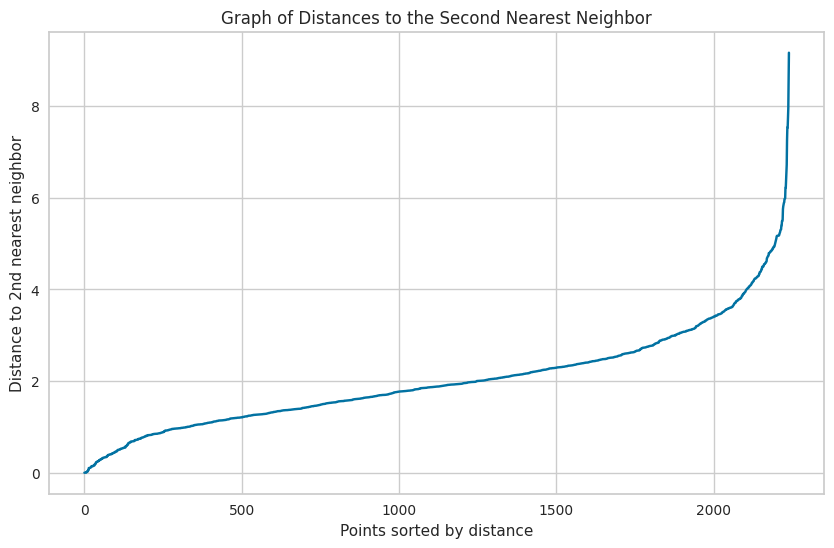

min_samples=1: Number of Clusters: 232
min_samples=3: Number of Clusters: 25
min_samples=5: Number of Clusters: 13
min_samples=7: Number of Clusters: 5
min_samples=9: Number of Clusters: 7
min_samples=11: Number of Clusters: 6
min_samples=13: Number of Clusters: 6
min_samples=15: Number of Clusters: 5
min_samples=17: Number of Clusters: 5
min_samples=19: Number of Clusters: 5
min_samples=21: Number of Clusters: 4
min_samples=23: Number of Clusters: 3
min_samples=25: Number of Clusters: 3
min_samples=27: Number of Clusters: 2
min_samples=29: Number of Clusters: 2
min_samples=31: Number of Clusters: 2
min_samples=33: Number of Clusters: 2
min_samples=35: Number of Clusters: 2
min_samples=37: Number of Clusters: 2
min_samples=39: Number of Clusters: 2
Optimal DBSCAN Number of Clusters: 4


In [204]:
# Выбор eps с использованием графика расстояний
X_scaled = data_embedding_pca  # Используем данные после PCA

# Нахождение расстояний до ближайших соседей
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Расстояния до второго ближайшего соседа
distances = np.sort(distances[:, 1], axis=0)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Graph of Distances to the Second Nearest Neighbor')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.show()

# Подбор min_samples
min_samples_values = [i for i in range(1, 41, +2)]
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=3.7, min_samples=min_samples)
    dbscan_clusters = dbscan.fit_predict(X_scaled)
    num_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
    print(f"min_samples={min_samples}: Number of Clusters: {num_clusters}")

# После определения значения eps из графика и подходящего min_samples из анализа,
# можно использовать эти параметры для окончательной кластеризации
optimal_eps = 3.7  # Из графика расстояний
optimal_min_samples = 21  # Из анализа

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Вывод результатов
unique_clusters = set(dbscan_clusters)
num_clusters = len(unique_clusters) - (1 if -1 in dbscan_clusters else 0)
print(f"Optimal DBSCAN Number of Clusters: {num_clusters}")


В итоге для параметров eps и min_samples мы выбрали значения 3.7 и 21 соответственно и получили количество кластеров равное 4.

## 4.3. Интерпретация результатов DBSCAN

Number of points in each cluster:
Cluster
 0    1438
-1     598
 1     144
 3      38
 2      22
Name: count, dtype: int64
Number of outliers: 598


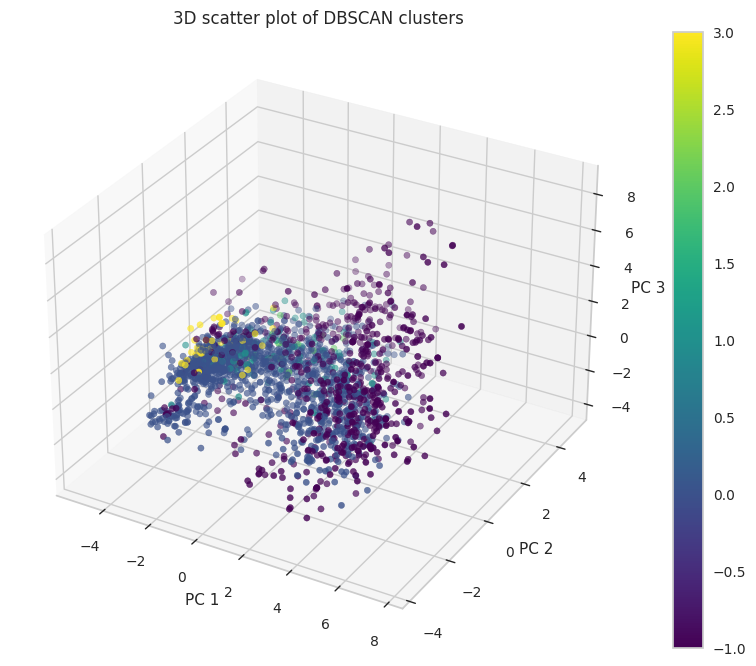

In [205]:
# Преобразуем результаты в DataFrame для удобства анализа
results_df = pd.DataFrame(X_scaled, columns=[f'PC{i+1}' for i in range(X_scaled.shape[1])])
results_df['Cluster'] = dbscan_clusters

# Количество точек в каждом кластере
cluster_counts = results_df['Cluster'].value_counts()
print("Number of points in each cluster:")
print(cluster_counts)

# Количество выбросов
num_outliers = (results_df['Cluster'] == -1).sum()
print(f"Number of outliers: {num_outliers}")


# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(results_df.iloc[:, 0], results_df.iloc[:, 1], results_df.iloc[:, 2], 
                     c=results_df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.title('3D scatter plot of DBSCAN clusters')
plt.show()

Как мы видим на графике, результаты получились достаточно странными и не такими, как ожидалось. Стоит попробовать другие методы кластеризации, а затем уже выбрать тот, результат работы которого будет удовлетворительным.

# 5. Использование других алгоритмов кластеризации

Попробуем разные другие методы кластеризации. Определим количество кластеров, которое хотим видеть, с помощью метода локтя.

Elbow Method to determine the number of clusters to be formed:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

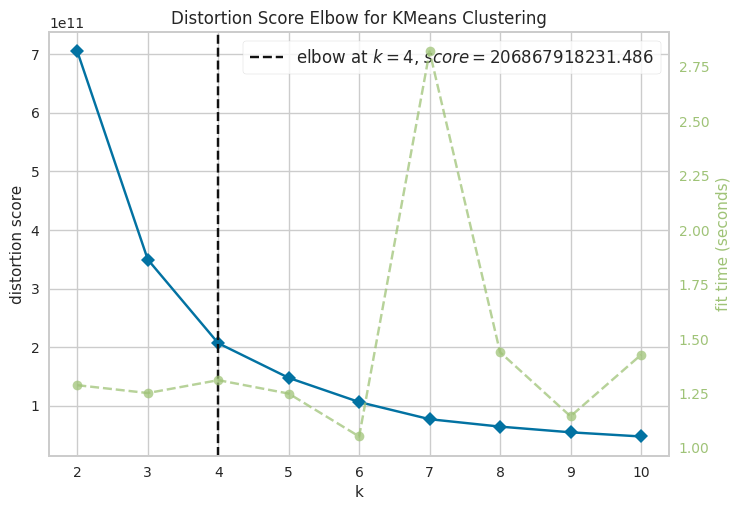

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [206]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

Получили, что оптимальное количество кластеров - 4 (как и определили, используя алгоритм кластеризации DBSCAN).

## 5.1. K-Means

**K-Means** — один из наиболее распространенных алгоритмов кластеризации. Он хорошо работает, если кластеры имеют форму, близкую к округлой. Он требует предварительного выбора числа кластеро.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



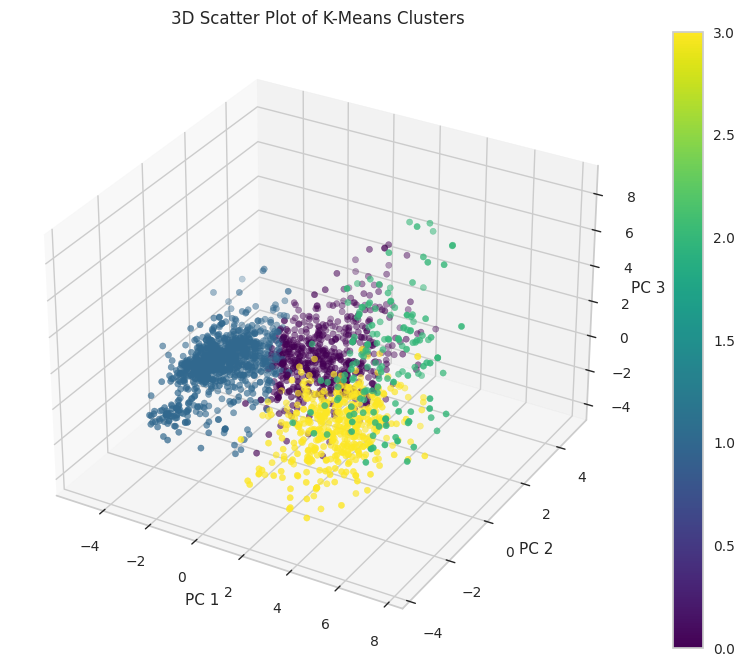

In [207]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)
results_df['KMeans_Cluster'] = kmeans_clusters

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=results_df['KMeans_Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot of K-Means Clusters')
plt.show()

## 5.2. Hierarchical Clustering (Иерархическая кластеризация)

**Hierarchical Clustering (Иерархическая кластеризация)** создает иерархию кластеров, которые могут быть объединены или разделены. Обычно используется дендрограмма для выбора числа кластеров.

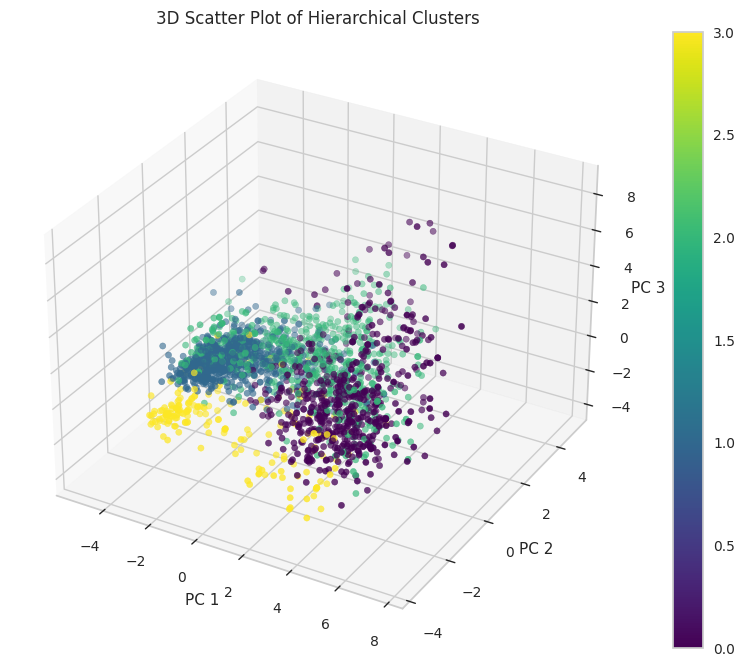

In [208]:
# Применение иерархической кластеризации
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_clusters = hierarchical.fit_predict(X_scaled)
results_df['Hierarchical_Cluster'] = hierarchical_clusters

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=results_df['Hierarchical_Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot of Hierarchical Clusters')
plt.show()

## 5.3. Mean Shift

**Mean Shift** — алгоритм кластеризации, который обнаруживает центры кластеров, сдвигаясь в сторону области с высокой плотностью.

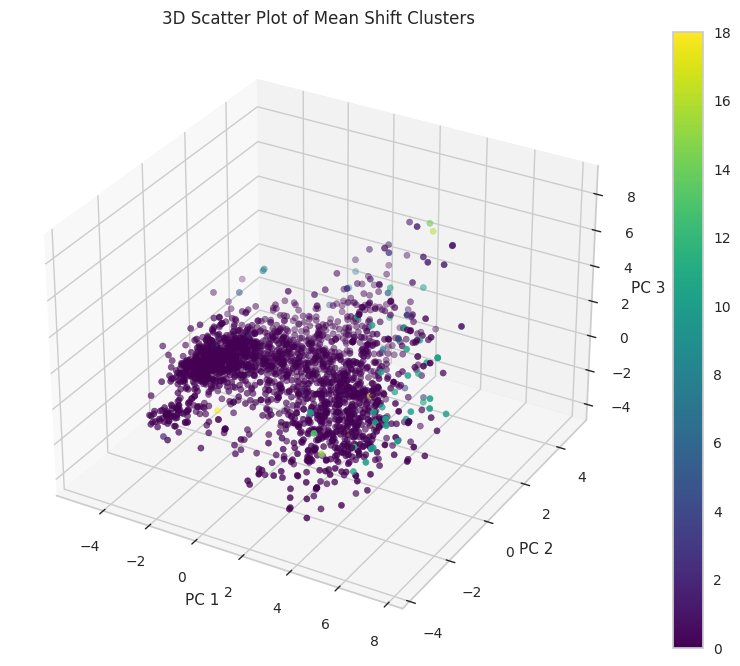

In [209]:
# Применение Mean Shift
mean_shift = MeanShift()
mean_shift_clusters = mean_shift.fit_predict(X_scaled)
results_df['MeanShift_Cluster'] = mean_shift_clusters

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=results_df['MeanShift_Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot of Mean Shift Clusters')
plt.show()

## 5.4. Gaussian Mixture Models (GMM)

**GMM** — вероятностная модель, которая предполагает, что данные приходят из смеси нескольких гауссовских распределений.

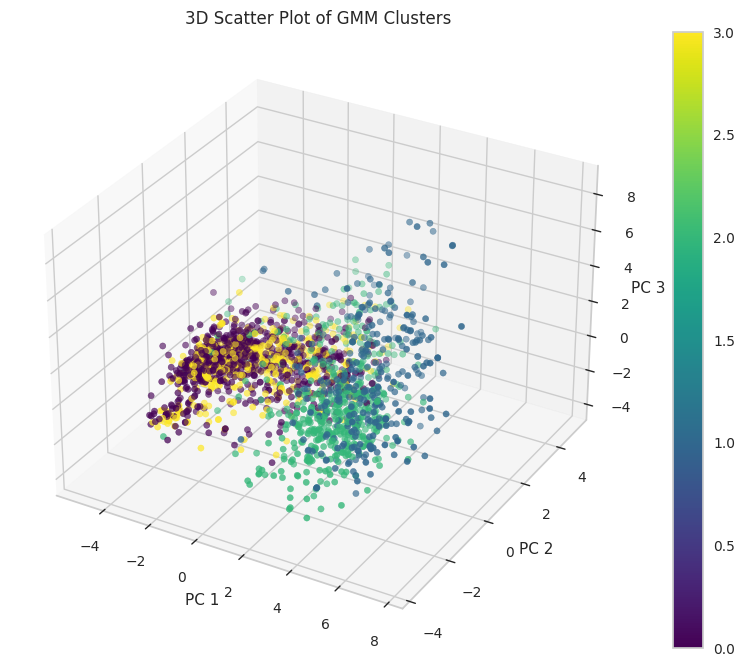

In [210]:
# Применение GMM
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)
results_df['GMM_Cluster'] = gmm_clusters

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=results_df['GMM_Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot of GMM Clusters')
plt.show()

## 5.5. Spectral Clustering

**Spectral Clustering** использует информацию о спектре графа данных для кластеризации.

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



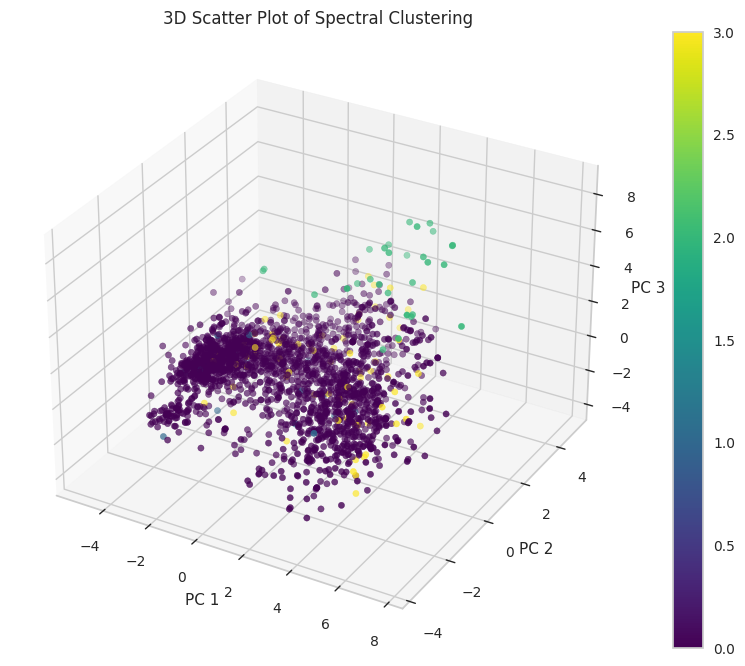

In [211]:
# Применение Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral.fit_predict(X_scaled)
results_df['Spectral_Cluster'] = spectral_clusters

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=results_df['Spectral_Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot of Spectral Clustering')
plt.show()

## 5.6. Agglomerative Clustering

**Agglomerative Clustering** — это метод иерархической кластеризации, который строит дерево кластеров (дендрограмму) путём последовательного объединения (агрегации) пар кластеров. В начале каждый объект считается отдельным кластером. Затем на каждом шаге объединяются два наиболее похожих кластера, пока не будет достигнуто желаемое количество кластеров или не останется только один кластер.

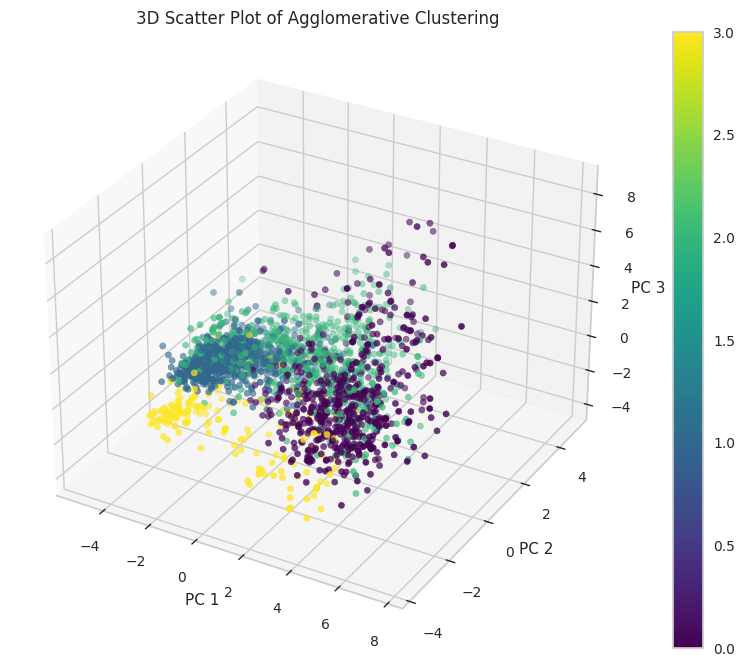

In [212]:
# Применение Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative_clusters = agglomerative.fit_predict(X_scaled)
results_df['Agglomerative_Cluster'] = agglomerative_clusters

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=results_df['Agglomerative_Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot of Agglomerative Clustering')
plt.show()

# 6. Интерпретация результатов

По итогу можно сказать, что алгоритм кластеризации K-Means наилучшим образом разделил данные на кластеры (то есть произвёл сегментацию клиентов). Теперь интерпретируем полученные результаты.

## 6.1. Анализ основных характеристик кластеров

Посчитаем средние значения признаков по кластерам:

In [213]:
# Добавляем метки кластеров в DataFrame
data['Cluster'] = kmeans_clusters

# Рассчитываем средние значения признаков по кластерам
cluster_summary = data.groupby('Cluster').mean()

# Сохраняем в CSV файл
cluster_summary.to_csv('/kaggle/working/cluster_summary.csv')

print(cluster_summary)

                  ID        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        5492.321008  57179.612605  0.253782  0.946218  48.011765  458.947899   
1        5631.672179  35046.196984  0.791829  0.439689  49.481518   39.829767   
2        5433.841060  81367.718543  0.052980  0.132450  46.304636  893.602649   
3        5683.772532  74414.548283  0.047210  0.212446  50.598712  497.560086   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0        20.100840       130.573109        27.295798         20.672269  ...   
1         5.096304        23.243191         7.405642          5.194553  ...   
2        54.145695       469.026490        79.337748         62.642384  ...   
3        71.978541       432.532189       103.482833         71.935622  ...   

         Education_encoded  2n_Cycle_f

Визуализируем распределения признаков по кластерам. Это поможет понять, какие характеристики наиболее типичны для каждого кластера.

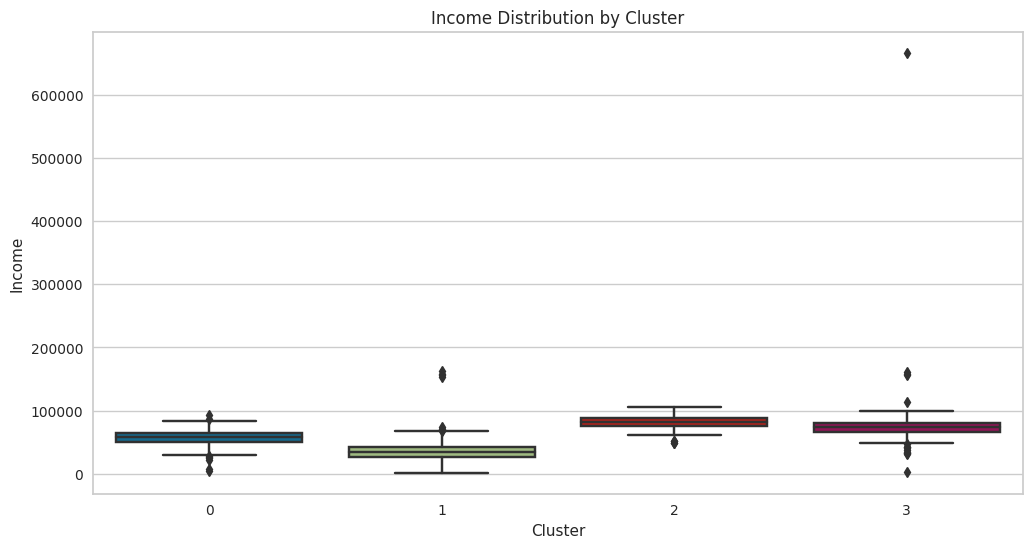

In [214]:
# Визуализация распределения доходов по кластерам
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Income Distribution by Cluster')
plt.show()

## 6.2. Создание профилей клиентов для каждого кластера

На основе средних значений признаков по кластерам можно сформулировать профили клиентов для каждого кластера:

### Кластер 0:
- Доход: Средний — около 57,180.
- Дети: Почти один подросток (0.95) и небольшое количество маленьких детей (0.25).
- Покупки: Основное потребление направлено на вина (459) и мясные продукты (130). Покупают меньше фруктов и сладостей.
- Образование: Большинство имеют среднее образование.
- Семейное положение: Преобладают "Married" и "Together", значительное количество "Divorced" (13%).

### Кластер 1:
- Доход: Низкий — около 35,046.
- Дети: В среднем больше маленьких детей (0.79), чем подростков (0.44).
- Покупки: Низкие затраты на все категории, особенно на вина и мясные продукты.
- Образование: Более низкий уровень образования, чем в других кластерах.
- Семейное положение: Преобладают "Married" и "Single". Значительное количество одиночек.

### Кластер 2:
- Доход: Высокий — около 81,368.
- Дети: Почти нет маленьких детей и подростков.
- Покупки: Самые большие затраты на вина (893), мясные продукты (469) и рыбу (79).
- Образование: Высокий уровень образования.
- Семейное положение: Большинство женаты или вместе. 

### Кластер 3:
- Доход: Высокий — около 74,415.
- Дети: Почти нет детей.
- Покупки: Затраты на вина (497), мясо (432), и рыбу (103) выше среднего.
- Образование: Преимущественно среднее и высшее образование.
- Семейное положение: Преобладают "Married" и "Together", с некоторыми вдовами.

# 7. Итог

Итогом сегментации клиентов стало выявление четких профилей, что может существенно помочь в достижении нескольких ключевых целей:

1. Персонализированные маркетинговые стратегии:
   - Каждый кластер представляет собой группу клиентов с уникальными предпочтениями и уровнями доходов. Это позволяет настраивать целевые маркетинговые кампании для каждой группы, что повысит эффективность рекламы и продажи.

2. Оптимизация продуктов и услуг:
   - Понимание того, какие категории продуктов пользуются спросом у разных сегментов, поможет компании лучше планировать ассортимент, акции и предложения. Например, для кластера 2 (высокие доходы, большие траты на вина и мясные продукты) можно предложить премиальные товары, а для кластера 1 (низкие доходы) — более дешёвые товары и доступные предложения.

3. Улучшение клиентского опыта:
   - Знание структуры семьи (например, наличие маленьких детей или подростков) поможет предлагать услуги и продукты, соответствующие их потребностям.

4. Распределение ресурсов:
   - Анализ предпочтений и покупательской активности позволяет лучше распределить маркетинговые ресурсы, сосредоточив их на наиболее выгодных сегментах клиентов.

Таким образом, проделанная работа может помочь компании более точно понимать свою клиентскую базу, что может привести к повышению прибыли за счет улучшения таргетинга, оптимизации ассортимента и персонализированного подхода к клиентам.